# **APRESENTAÇÃO**

Obesidade é uma doença complexa que envolve uma quantidade muito grande de gordura corporal. Ela não é apenas uma preocupação estética. É um problema de saúde que contribui para o aumento de risco de outras doenças como diabetes e pressão alta, por exemplo. 

Normalmente a obesidade é resultado de fatores hereditários, fisiológicos e ambientais, somados a alimentação desbalanceada e falta de exercício físico.

Por convenção, pessoas que têm um IMC acima de 30 são consideradas obesas.





# **IMPORTANDO DADOS**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from pylab import rcParams

dim = rcParams['figure.figsize'] = 16, 5

In [2]:
df = pd.read_csv('obesity_cleaned.csv')

## **VERIFICANDO OS DADOS**

Verifico que não tenho dados faltantes no DataFrame, porém, todas as colunas estão com o tipo Object e isso pode atrapalhar minha análise.

Por conta disso, creio que terei que fazer alterações em algumas colunas.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


### **VERIFICANDO CONTEUDO DO DATA FRAME**

Já vejo que a coluna Obesity (%) tem que ser tratada. Da forma como está fica muito difícil extrair alguma informação relevante. 

Neste caso, irei criar uma nova coluna onde pegarei apenas os 3 primeiros elementos da coluna, ou seja, do 0 ao 2.

Creio que a coluna Unnamed: 0 é um erro de coleta e por este motivo vou deletá-la.

Também definirei a coluna ano como int. Mas antes quero ver até quando tenho dados e quais valores tenho em cada uma das colunas para compreender melhor os dados que irei manipular.


In [4]:
df.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [5]:
df.tail()

,Unnamed: 0,Country,Year,Obesity (%),Sex
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male
24569,24569,Zimbabwe,2016,25.3 [19.1-32.0],Female


In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.head()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [8]:
paises = df['Country'].unique()
print(f'Quantidade de paises = {len(paises)} \n')
print(f'Lista de paises: \n{paises}')


Quantidade de paises = 195 

Lista de paises: 
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Côte d'Ivoire" "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 

In [9]:
print(f'Range de Anos')
print(f'{df["Year"].min()} - {df["Year"].max()} ')

Range de Anos
1975 - 2016 


In [10]:
print(f'Conteudo coluna SEX: \n{df["Sex"].unique()}')

Conteudo coluna SEX: 
['Both sexes' 'Male' 'Female']


# **TRATAMENTO DOS DADOS**

Agora que já tenho noção do conteúdo das colunas, irei tratar uma a uma de forma adequada. 

- **Coluna ano** - Será transformada para o tipo inteiro

- **Obesity (%)** - Pegarei apenas os 3 primeiros elementos da coluna e armazenarei em uma nova. Depois, ela será excluída do Data Frame

## **COLUNA YEAR**

Será transformada para tipo int

In [11]:
df['Year'] = df['Year'].astype('int')

In [12]:
df.dtypes

Country        object
Year            int64
Obesity (%)    object
Sex            object
dtype: object

## **TRATAMENTO DA COLUNA Obesity (%)**

Como já mencionado, nesta coluna eu utilizarei apenas os 3 primeiros elementos.

Para armazená-los eu criarei uma nova coluna e pegarei os dados através de um slicing.

In [13]:
df['Obesity'] = df['Obesity (%)'].apply(lambda x: x.split('[')[0].strip())

In [14]:
df = df.drop('Obesity (%)', axis = 1)

In [15]:
df.head()

,Country,Year,Sex,Obesity
0,Afghanistan,1975,Both sexes,0.5
1,Afghanistan,1975,Male,0.2
2,Afghanistan,1975,Female,0.8
3,Afghanistan,1976,Both sexes,0.5
4,Afghanistan,1976,Male,0.2


In [16]:
df.dtypes

Country    object
Year        int64
Sex        object
Obesity    object
dtype: object

### **PROBLEMA QUE ENCONTREI**

Assim que peguei os dados para a coluna que eu criei, fui tentar converter os dados para float.

Porém, não consegui. Recebi a mensagem de que a coluna possuía dados faltantes. 

Para ver quais dados eram, eu utilizei o Método value_counts().

Assim que identifiquei os dados que estavam faltando, eu atribuí nan para todos eles e na sequência os exclui utilizando o método dropna.

Com isso eu consegui converter os dados para string

In [17]:
df['Obesity'].value_counts()

No data    504
0.4        222
0.6        218
0.5        217
0.7        210
          ... 
60.1         1
56.3         1
59.8         1
55.5         1
46.5         1
Name: Obesity, Length: 602, dtype: int64

In [18]:
df.loc[df['Obesity'] == 'No data'] = np.nan

In [19]:
df['Obesity'] = df['Obesity'].dropna()

In [20]:
df['Obesity'].value_counts()

0.4     222
0.6     218
0.5     217
0.7     210
0.8     201
       ... 
62.1      1
56.8      1
54.1      1
60.0      1
46.5      1
Name: Obesity, Length: 601, dtype: int64

In [21]:
df['Obesity'] = df['Obesity'].astype('float')

In [22]:
df.dtypes

Country     object
Year       float64
Sex         object
Obesity    float64
dtype: object

# **VISUALIZANDO OS DADOS**

## **VERIFICANDO PERCENTUAL DE OBESIDADE ENTRE HOMENS E MULHRES NO MUNDO**

 - Mulheres são 66% mais obesas do que os homens

In [23]:
temp = df.groupby('Sex')['Obesity'].mean()
temp

Sex
Both sexes    12.480379
Female        15.533433
Male           9.332984
Name: Obesity, dtype: float64

In [24]:
(temp.values[1] / temp.values[2] - 1 ) * 100

66.4358641470725

## **VERIFICANDO PAISES COM MENOR PERCENTUAL DE OBESIDADE**

Para esta visão, eu criei dois DataFrames, um pegando o ano de 1975 e outro pegando o ano de 2016

Na sequência defini a coluna Country como o Index. Com isso na hora de fazer o calcula, já terei a referência por países.

Com isso, consegui verificar os países onde o crescimento da obesidade foi maior e os países onde o crescimento foi menor.

In [25]:
start = df[df['Year'] == 1975]
end = df[df['Year'] == 2016]

In [26]:
start.set_index('Country', inplace  = True)
end.set_index('Country', inplace = True)

In [27]:
obesidade  = end[end['Sex'] == 'Both sexes']['Obesity'] - start[start['Sex'] == 'Both sexes']['Obesity'] 

In [28]:
menores  = obesidade.sort_values(ascending = False).head()

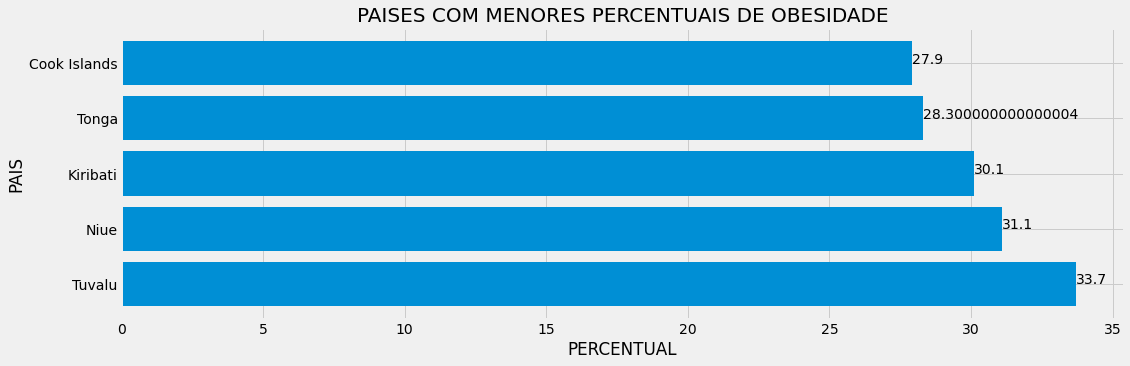

In [37]:
rcParams['figure.figsize'] = 16, 5

ax1 = plt.subplot()

ax1.barh(menores.index, menores.values)
for pY,pX in enumerate(menores.sort_values(ascending = False)):
    ax1.annotate(pX,xy = (pX,pY))


plt.title('PAISES COM MENORES PERCENTUAIS DE OBESIDADE', fontsize = 20)
plt.ylabel('PAIS')
plt.xlabel('PERCENTUAL')
plt.style.use('fivethirtyeight')

plt.show()

plt.show()

## **VERIFICANDO PAISES COM MAIORES NIVEIS DE OBESIDADE**

In [30]:
maiores = obesidade.sort_values(ascending = True).head()

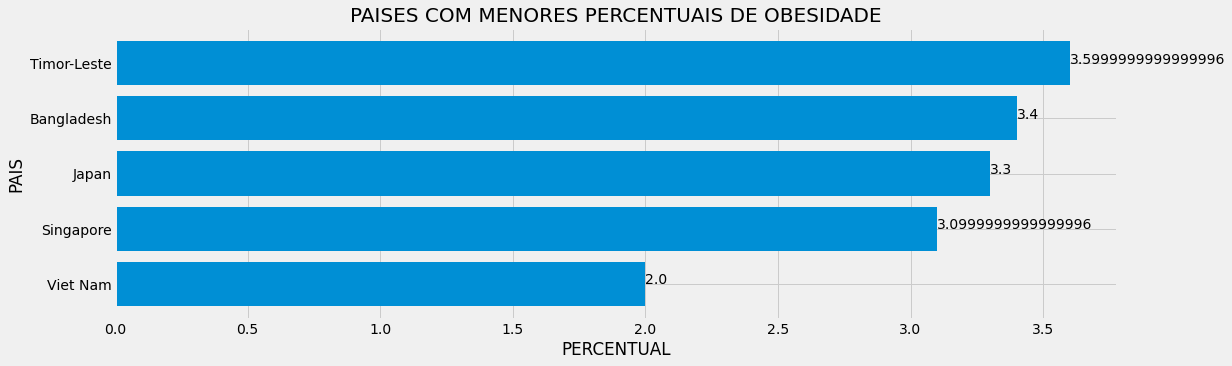

In [31]:

rcParams['figure.figsize'] = 16, 5

ax1 = plt.subplot()

ax1.barh(maiores.index, maiores.values)
for pY,pX in enumerate(maiores.sort_values(ascending = True)):
    ax1.annotate(pX,xy = (pX,pY))

plt.title('PAISES COM MENORES PERCENTUAIS DE OBESIDADE', fontsize = 20)
plt.ylabel('PAIS')
plt.xlabel('PERCENTUAL')
plt.style.use('fivethirtyeight')

plt.show()

## **EVOLUÇÃO DE OBESIDADE NOS ULTIMOS ANOS ENTRE HOMENS E MULHERES**

In [32]:
ambos = df[df['Sex'] == 'Both sexes']

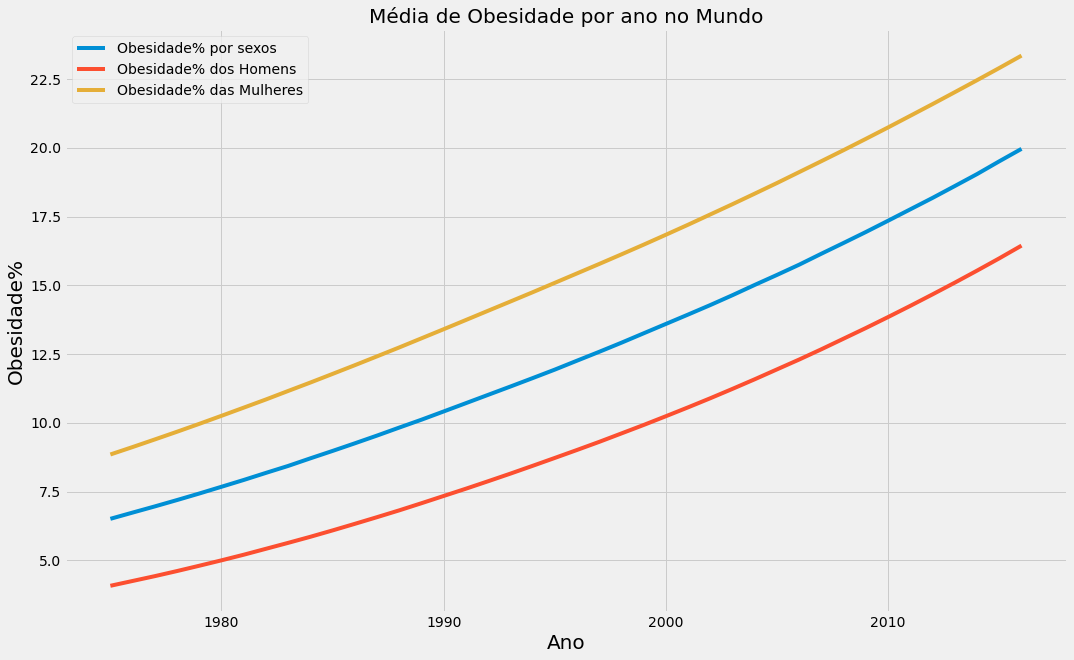

In [33]:
#Separando por genero


rcParams['figure.figsize'] = 16, 10
todos_sexos = df[df['Sex'] == 'Both sexes'].groupby('Year').mean()
homens = df[df['Sex'] == 'Male'].groupby('Year').mean()
mulheres = df[df['Sex'] == 'Female'].groupby('Year').mean()

plt.plot(todos_sexos, label = 'Obesidade% por sexos')
plt.plot(homens, label = 'Obesidade% dos Homens')
plt.plot(mulheres, label = 'Obesidade% das Mulheres')


plt.xlabel('Ano', fontsize=20)
plt.ylabel('Obesidade%', fontsize=20)
plt.title('Média de Obesidade por ano no Mundo', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend();





### **VERIFICANDO OS DADOS DO BRASIL**

In [34]:
#Fazendo a seleção dos dados do Brasil
brasil = df[df['Country'] == 'Brazil']

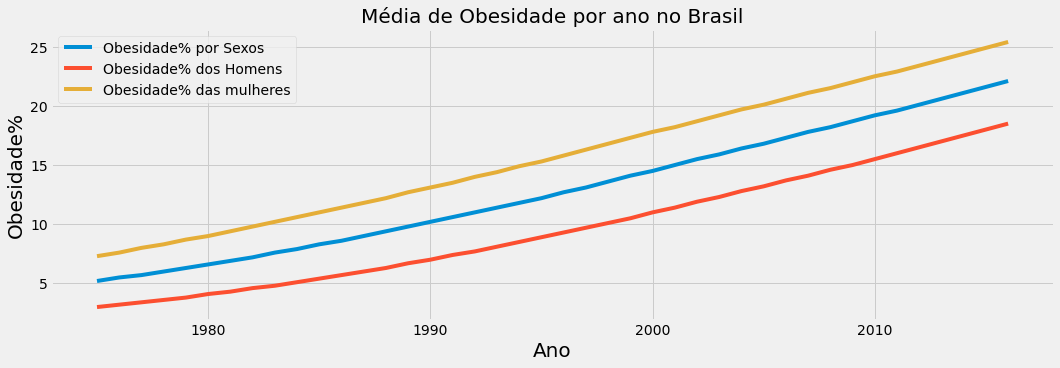

In [35]:
#Separando os dados por Genero
brasil_todos = brasil[brasil['Sex'] == 'Both sexes'].groupby('Year').mean()
brasil_homens = brasil[brasil['Sex'] == 'Male'].groupby('Year').mean()
brasil_mulheres = brasil[brasil['Sex'] == 'Female'].groupby('Year').mean()

rcParams ['figure.figsize'] = 16,5

plt.plot(brasil_todos, label = 'Obesidade% por Sexos')
plt.plot(brasil_homens, label = 'Obesidade% dos Homens')
plt.plot(brasil_mulheres, label = 'Obesidade% das mulheres')

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Obesidade%', fontsize=20)
plt.title('Média de Obesidade por ano no Brasil', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend();



## **COMPARANDO A MÉDIA DE OBESIDADE DO BRASIL COM O RESTANTE DO MUNDO**

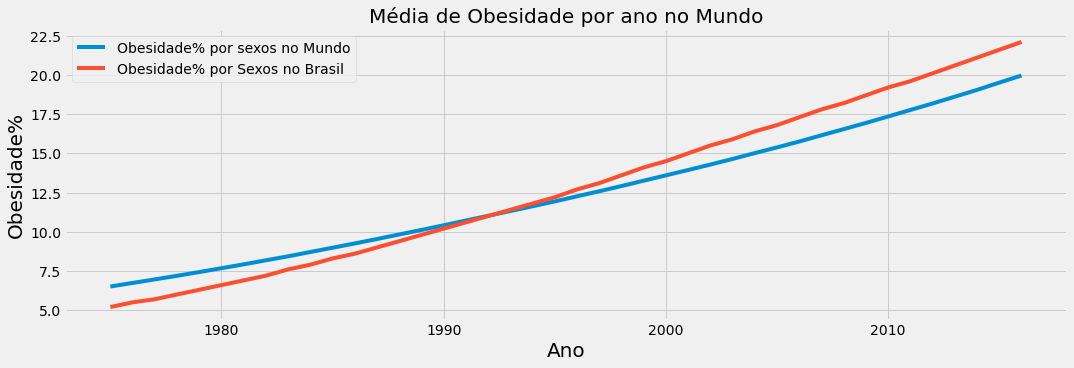

In [36]:

rcParams['figure.figsize'] = 16, 5
todos_sexos = df[df['Sex'] == 'Both sexes'].groupby('Year').mean()
homens = df[df['Sex'] == 'Male'].groupby('Year').mean()
mulheres = df[df['Sex'] == 'Female'].groupby('Year').mean()

plt.plot(todos_sexos, label = 'Obesidade% por sexos no Mundo')
plt.plot(brasil_todos, label = 'Obesidade% por Sexos no Brasil')


plt.xlabel('Ano', fontsize=20)
plt.ylabel('Obesidade%', fontsize=20)
plt.title('Média de Obesidade por ano no Mundo', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend();

# **CONCLUSÃO**

Chama muito atenção o fato das mulheres apresentarem índice de obesidade maior do que os homens. 
De toda forma, podemos notar que o problema da obesidade é um problema que vem crescendo no mundo todo.

No Brasil, mesmo com tanto apelo ao físico, ainda temos índices maiores do que a média mundial, pelo menos até o ano de 2016. 

Seria interessante comparar estes dados com a evolução do PIP. Creio que à medida que a população vai tendo mais acesso a carro ou motocicleta, este números tendem a aumentar. 